# Predicting House Prices

Coding Samurai Data Science Internship

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

In [8]:
plt.rcParams['figure.figsize'] = (10,8)
sns.set_theme(style="darkgrid")  #setting up the configuration for plotting using the matplotlib library with seaborn styling.

In [3]:
from sklearn import  linear_model #This imports the linear_model module from scikit-learn.
from sklearn import metrics # This imports the metrics module from scikit-learn. 
from sklearn.model_selection import train_test_split #Importing the train_test_split function from the model_selection module
from sklearn.preprocessing import MinMaxScaler #Importing MinMaxScaler class from the preprocessing module of scikit-learn.

In [4]:
df = pd.read_csv("D:\Coding Samurai\HousingPrices-Amsterdam-August-2021.csv", index_col=0)
df         #Loading the dataset

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


# Data Cleaning and Preprocessing

In [6]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


In [7]:
df = df.dropna()  # Removing any missing values (NaNs) from the DataFrame 

In [9]:
df.isnull().sum() #Checking for null values

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

# Exploratory Data Analysis for House Price Prediction

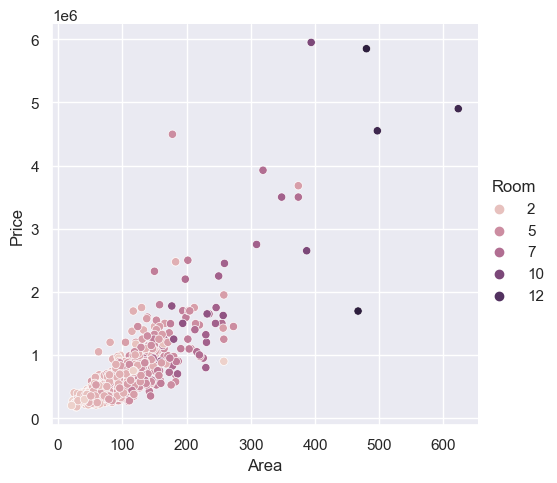

In [14]:
#Scatter plot
sns.relplot(x="Area", y="Price", hue="Room", data=df)
plt.show()  # visualizing relationship between the variables "Area" and "Price"

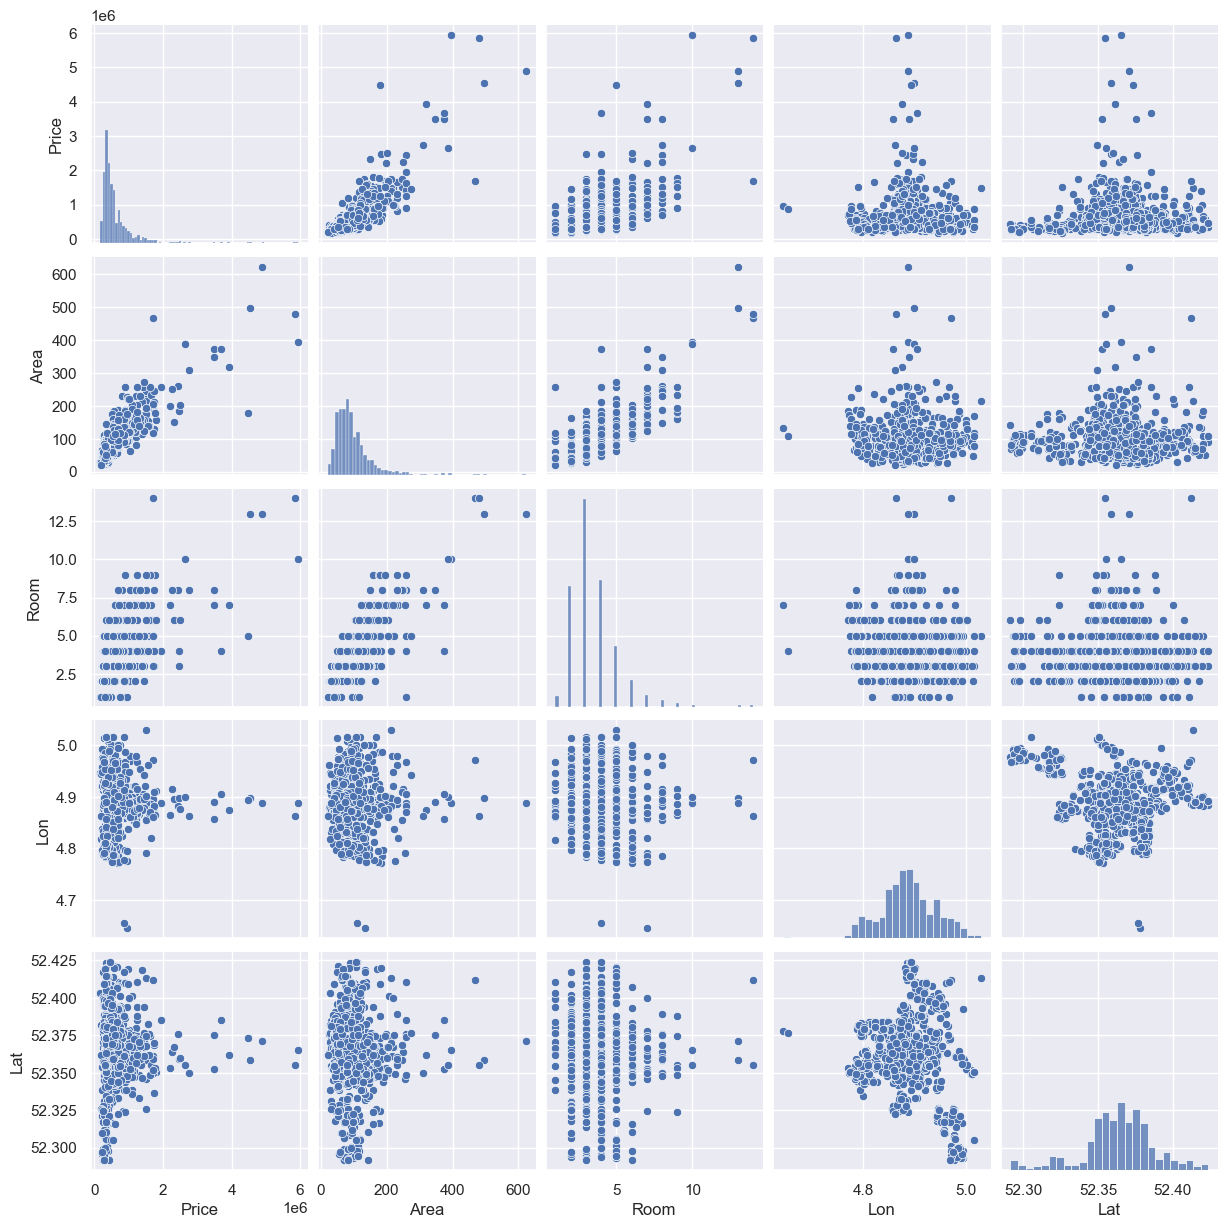

In [15]:
#Pair plot
sns.pairplot(df) #

C:\Users\ANUP\AppData\Local\Temp\ipykernel_10956\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

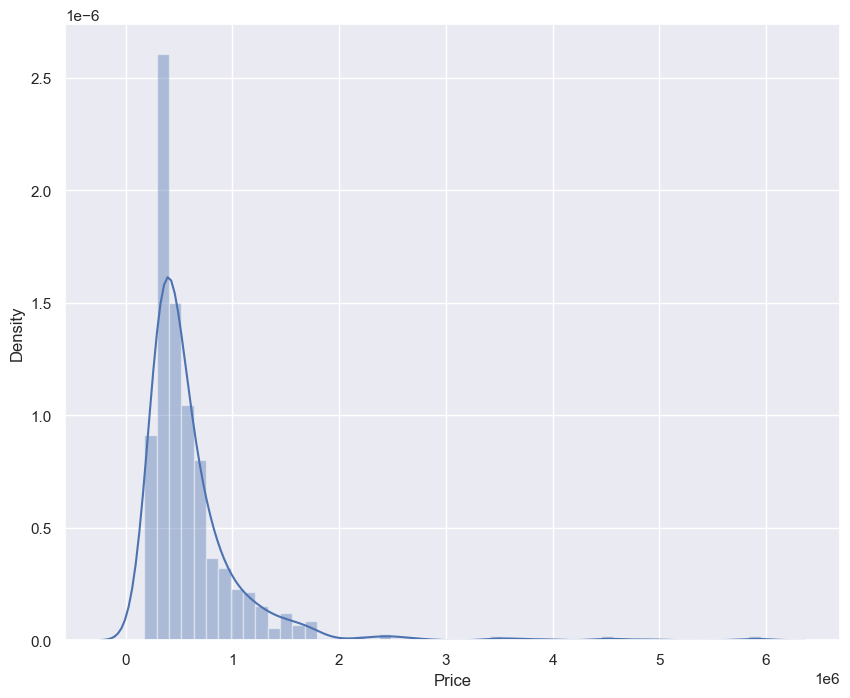

In [16]:
# Distribution plot 
sns.distplot(df['Price']) # Displaying distribution of prices

C:\Users\ANUP\AppData\Local\Temp\ipykernel_10956\768373950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


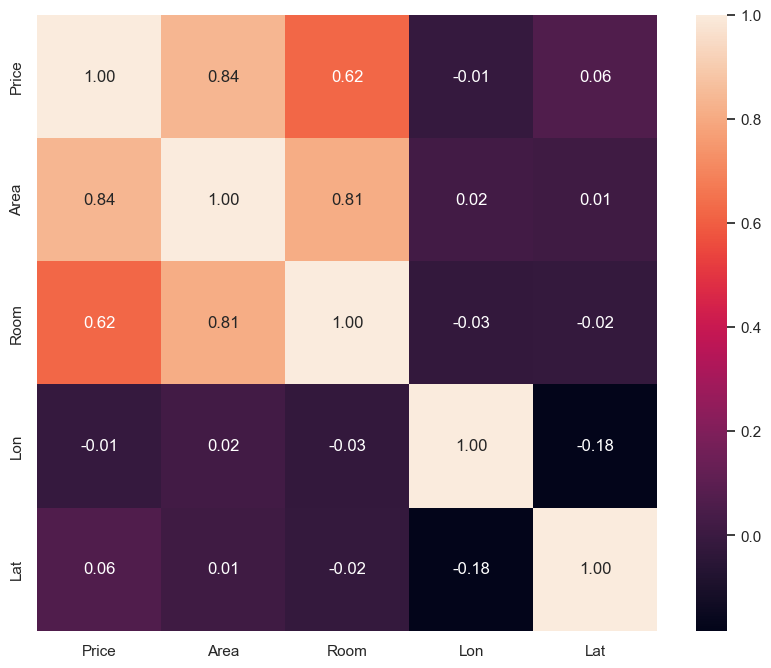

In [17]:
#Heat map
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show() # Displaying correlation matrix of the DataFrame

# Data Model

In [18]:
X = df[['Area', 'Room', 'Lat','Lon']]
y = df[['Price']]

In [20]:
# These variables represent the features and target variable, respectively, for the training set. 
#They will be used to train the machine learning model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [21]:
# training a linear regression model using the features (X_train) and the corresponding target variable (y_train).
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# taking model's baseline prediction before considering any input features.
print(regression.intercept_) 

[-50422541.60425282]


# Predictions from our Linear Regression Model

In [23]:
predictions = regression.predict(X_test)

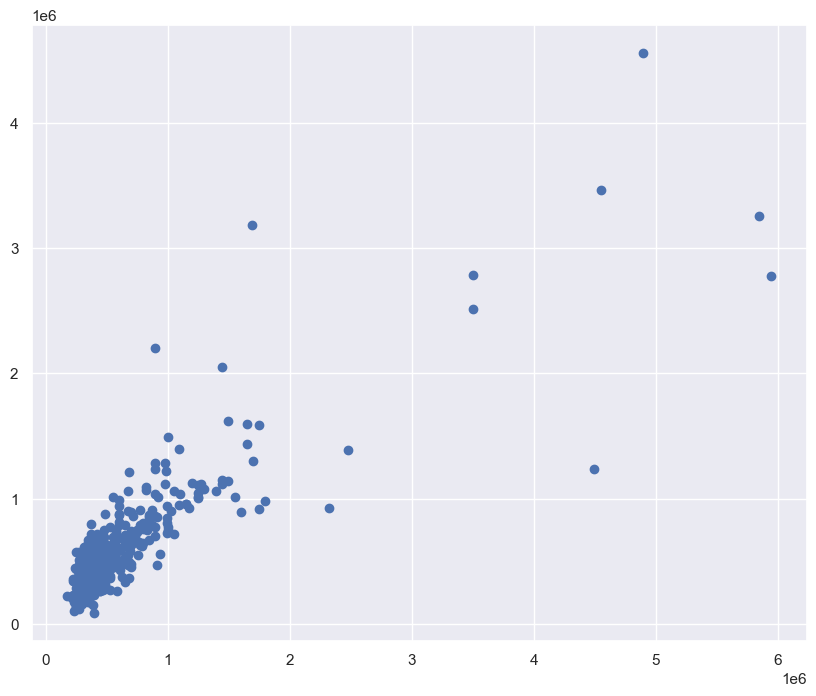

In [24]:
plt.scatter(y_test,predictions)

We can see from the scatter plot that our predicted values are quite near to the actual values.

# Regression Evaluation Metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 186263.21823826598
MSE: 135277681006.77783
RMSE: 367801.1432918308


In [26]:
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test, predictions))

Coefficient of determination: 0.70


# Our Linear Regression Model for Predicting House Prices is 70% accurate.